In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline

In [19]:
def catscatter(df,colx,coly,cols,color=['grey','black'],ratio=10,font='Helvetica',save=False,save_name='Default'):
    colx_codes=dict(zip(df[colx].sort_values().unique(),range(len(df[colx].unique()))))
    coly_codes=dict(zip(df[coly].sort_values(ascending=False).unique(),range(len(df[coly].unique()))))

    df[colx]=df[colx].apply(lambda x: colx_codes[x])
    df[coly]=df[coly].apply(lambda x: coly_codes[x])

    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.rcParams['font.sans-serif']=font
    plt.rcParams['xtick.color']=color[-1]
    plt.rcParams['ytick.color']=color[-1]
    plt.box(False)


    for num in range(len(coly_codes)):
        plt.hlines(num,-1,len(colx_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
    for num in range(len(colx_codes)):
        plt.vlines(num,-1,len(coly_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)

    plt.scatter(df[colx],
               df[coly],
               s=df[cols]*ratio,
               zorder=2,
               color=color[-1])

    plt.xticks(ticks=list(colx_codes.values()),labels=colx_codes.keys(),rotation=90)
    plt.yticks(ticks=list(coly_codes.values()),labels=coly_codes.keys())
    plt.xlim(xmin=-1,xmax=len(colx_codes))
    plt.ylim(ymin=-1,ymax=len(coly_codes))


In [20]:
df = pd.read_csv("/content/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
df['Outcome'] = df['Outcome'].astype('category',copy=False)

# Convert 0/1 values to 'Yes'/'No'
def convert_outcome(x):
    if x == 1:
        return 'Yes'
    else:
        return 'No'

df['Outcome'] = df['Outcome'].apply(convert_outcome)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [24]:
fig = make_subplots(rows=2, cols=4, subplot_titles=('<b>Distribution of Pregnancies</b>',
                                                    '<b>Distribution of Glucose</b>',
                                                    '<b>Distribution of Blood Pressure</b>',
                                                    '<b>Distribution of Skin Thickness</b>',
                                                    '<b>Distribution of Insulin</b>',
                                                    '<b>Distribution of BMI</b>',
                                                    '<b>Distribution of Diabetes Pedigree Func.</b>',
                                                    '<b>Distribution of Age</b>'
                                                   ))

fig.add_trace(go.Histogram(x=df['Pregnancies']), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Glucose']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['BloodPressure']), row=1, col=3)
fig.add_trace(go.Histogram(x=df['SkinThickness']), row=1, col=4)
fig.add_trace(go.Histogram(x=df['Insulin']), row=2, col=1)
fig.add_trace(go.Histogram(x=df['BMI']), row=2, col=2)
fig.add_trace(go.Histogram(x=df['DiabetesPedigreeFunction']), row=2, col=3)
fig.add_trace(go.Histogram(x=df['Age']), row=2, col=4)


fig.update_layout(
    showlegend=False,
    width=1000,
    height=400,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

fig.update_coloraxes(colorbar_tickfont_size=10)
fig.update_annotations(font_size=12)
fig.update_traces(opacity=0.75)

fig.show()

<Axes: >

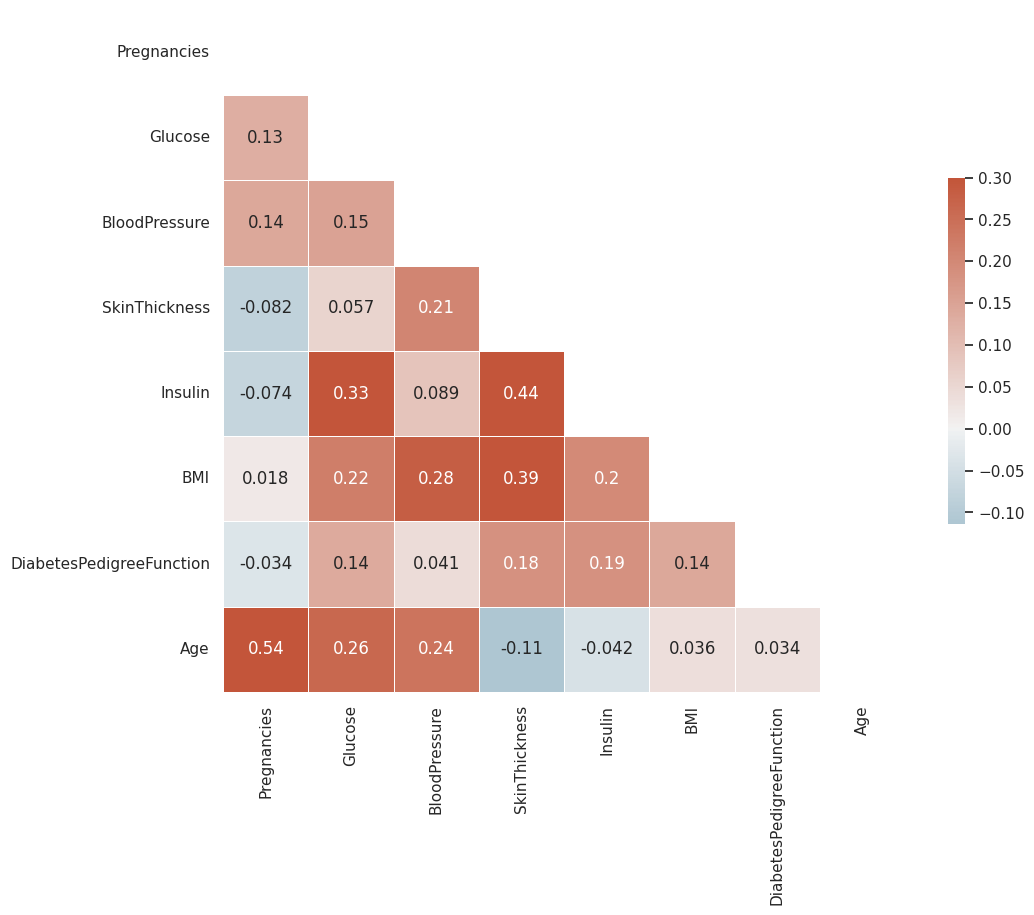

In [25]:
sns.set_theme(style="white")

d = df.drop(['Outcome'], axis=1)

corr = d.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
dfg = df['Outcome'].value_counts().reset_index()
dfg.columns = ['Outcome', 'Quantity']
fig = px.bar(dfg, x='Outcome', y='Quantity', title='Quantity of Patients by Outcome' )
fig.show()

In [27]:
fig = make_subplots(rows=2, cols=4, subplot_titles=('<b>Outcome vs. Pregnancies</b>',
                                                    '<b>Outcome vs. Glucose</b>',
                                                    '<b>Outcome vs. Blood Pressure</b>',
                                                    '<b>Outcome vs. Skin Thickness</b>',
                                                    '<b>Outcome vs. Insulin</b>',
                                                    '<b>Outcome vs. BMI</b>',
                                                    '<b>Outcome vs. Diabetes Pedigree Func.</b>',
                                                    '<b>Outcome vs. Age</b>'
                                                   ))

fig.add_trace(go.Box(y=df['Pregnancies'], x=df['Outcome']), row=1, col=1)
fig.add_trace(go.Box(y=df['Glucose'], x=df['Outcome']), row=1, col=2)
fig.add_trace(go.Box(y=df['BloodPressure'], x=df['Outcome']), row=1, col=3)
fig.add_trace(go.Box(y=df['SkinThickness'], x=df['Outcome']), row=1, col=4)
fig.add_trace(go.Box(y=df['Insulin'], x=df['Outcome']), row=2, col=1)
fig.add_trace(go.Box(y=df['BMI'], x=df['Outcome']), row=2, col=2)
fig.add_trace(go.Box(y=df['DiabetesPedigreeFunction'], x=df['Outcome']), row=2, col=3)
fig.add_trace(go.Box(y=df['Age'], x=df['Outcome']), row=2, col=4)


# Update visual layout
fig.update_layout(
    showlegend=False,
    width=1000,
    height=400,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

fig.update_coloraxes(colorbar_tickfont_size=10)

fig.update_annotations(font_size=12)
fig.update_traces(opacity=0.75)

fig.show()

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = StandardScaler().fit_transform(d)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [29]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

In [30]:
fig = px.scatter(
    distances,
    title='Distance Curve')
fig.update_xaxes(title_text='Distances')
fig.update_yaxes(title_text='Distance threashold (espsilon)')
fig.update_layout(showlegend=False)
fig.show()

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np


min_samples_values = range(2, 20)  # Giá trị min_samples từ 2 đến 19
best_score = -1
best_min_samples = None

for min_samples in min_samples_values:
    # Chạy DBSCAN
    db = DBSCAN(eps=1.8268, min_samples=min_samples).fit(X)
    labels = db.labels_

    if len(set(labels)) <= 1:
        continue

    # Tính Silhouette Score
    score = silhouette_score(X, labels)
    print(f"min_samples={min_samples}, Silhouette Score={score:.4f}")

    # Cập nhật giá trị tốt nhất
    if score > best_score:
        best_score = score
        best_min_samples = min_samples

print(f"\nOptimal min_samples={best_min_samples}, Best Silhouette Score={best_score:.4f}")


min_samples=2, Silhouette Score=0.0604
min_samples=3, Silhouette Score=0.0939
min_samples=4, Silhouette Score=0.2641
min_samples=5, Silhouette Score=0.2651
min_samples=6, Silhouette Score=0.2185
min_samples=7, Silhouette Score=0.2640
min_samples=8, Silhouette Score=0.2521
min_samples=9, Silhouette Score=0.2434
min_samples=10, Silhouette Score=0.2396
min_samples=11, Silhouette Score=0.2324
min_samples=12, Silhouette Score=0.2828
min_samples=13, Silhouette Score=0.2785
min_samples=14, Silhouette Score=0.2761
min_samples=15, Silhouette Score=0.2761
min_samples=16, Silhouette Score=0.2724
min_samples=17, Silhouette Score=0.2718
min_samples=18, Silhouette Score=0.2681
min_samples=19, Silhouette Score=0.2639

Optimal min_samples=12, Best Silhouette Score=0.2828


In [32]:
# Compute DBSCAN
db = DBSCAN(eps=1.8268, min_samples=12).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 1
Estimated number of noise points: 117
Silhouette Coefficient: 0.283


In [33]:
# Cluster-wise statistics with mean calculation
print("\nCluster-wise statistics with mean values:")
for cluster_label in set(labels):
    cluster_points = X[labels == cluster_label]
    if cluster_label == -1:
        print(f"Cluster {cluster_label} (Noise): {cluster_points.shape[0]} points")
    else:
        cluster_mean = cluster_points.mean(axis=0)  # Mean of all points in this cluster
        print(f"Cluster {cluster_label}: {cluster_points.shape[0]} points")
        print(f"  Mean value of cluster: {cluster_mean}")



Cluster-wise statistics with mean values:
Cluster 0: 651 points
  Mean value of cluster: [-0.03199068 -0.07722558  0.13439349 -0.00358777 -0.09229026 -0.00562819
 -0.10992338 -0.07382329]
Cluster -1 (Noise): 117 points


In [34]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("PCA transformation complete. Data reduced to 2 dimensions.")


PCA transformation complete. Data reduced to 2 dimensions.


<ipython-input-35-97a86380a626>:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



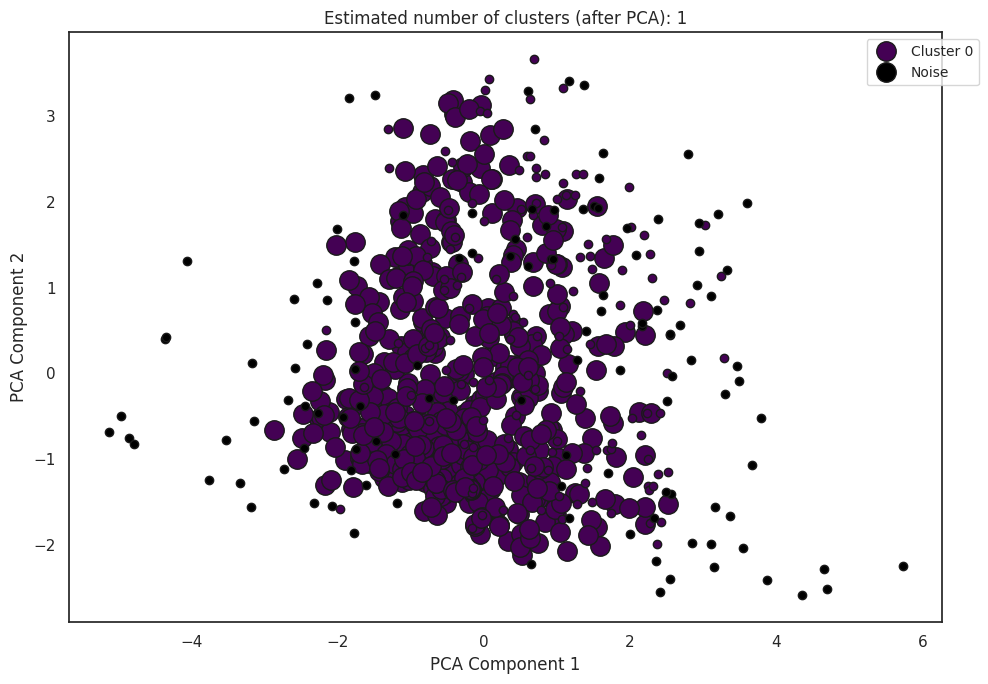

In [35]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Visualize the clusters with 'viridis' colormap
unique_labels = set(labels)
n_clusters_total = len(unique_labels)  # Total number of clusters including noise
viridis = plt.cm.get_cmap('viridis', n_clusters_total)

plt.figure(figsize=(10, 7))
for k in unique_labels:
    if k == -1:
        # Black used for noise.
        color = [0, 0, 0, 1]
    else:
        # Use viridis colormap for clusters
        color = viridis(k / (n_clusters_total - 1))  # Normalize to [0, 1] for colormap

    class_member_mask = (labels == k)

    # Core points
    xy = X_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color),
             markeredgecolor='k', markersize=14, label=f'Cluster {k}' if k != -1 else 'Noise')

    # Non-core points
    xy = X_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters (after PCA): %d' % n_clusters_)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()


In [36]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

# Chọn dữ liệu Glucose và BMI
X_glucose_bmi = X[:, [1, 5]]

# Thử nghiệm với nhiều giá trị min_samples
min_samples_values = range(2, 20)  # Bạn có thể thử với nhiều giá trị từ 2 đến 19
best_score = -1
best_min_samples = None

for min_samples in min_samples_values:
    db = DBSCAN(eps=1.8268, min_samples=min_samples).fit(X_glucose_bmi)
    labels = db.labels_

    # Bỏ qua khi tất cả các điểm đều bị gán vào noise (-1)
    if len(set(labels)) <= 1:
        continue

    # Tính Silhouette Score
    score = silhouette_score(X_glucose_bmi, labels)
    print(f"min_samples={min_samples}, Silhouette Score={score:.4f}")

    # Cập nhật min_samples tốt nhất
    if score > best_score:
        best_score = score
        best_min_samples = min_samples

print(f"\nOptimal min_samples={best_min_samples}, Best Silhouette Score={best_score:.4f}")


min_samples=2, Silhouette Score=0.6090
min_samples=3, Silhouette Score=0.6090
min_samples=4, Silhouette Score=0.6090
min_samples=5, Silhouette Score=0.6090
min_samples=6, Silhouette Score=0.6090
min_samples=7, Silhouette Score=0.6090
min_samples=8, Silhouette Score=0.5467
min_samples=9, Silhouette Score=0.5467
min_samples=10, Silhouette Score=0.5467
min_samples=11, Silhouette Score=0.5467
min_samples=12, Silhouette Score=0.6062
min_samples=13, Silhouette Score=0.6062
min_samples=14, Silhouette Score=0.6062
min_samples=15, Silhouette Score=0.6062
min_samples=16, Silhouette Score=0.6062
min_samples=17, Silhouette Score=0.6062
min_samples=18, Silhouette Score=0.6062
min_samples=19, Silhouette Score=0.6062

Optimal min_samples=2, Best Silhouette Score=0.6090


In [37]:
from sklearn.cluster import DBSCAN
import numpy as np

# Chọn hai cột Glucose và BMI từ dữ liệu gốc
X_glucose_bmi = X[:, [1, 5]]  # Giả định cột 1 là Glucose, cột 5 là BMI

# Perform DBSCAN clustering
db = DBSCAN(eps=1.8268, min_samples=2).fit(X_glucose_bmi)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters and noise points
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")


Estimated number of clusters: 2
Estimated number of noise points: 0


In [38]:
# Cluster-wise statistics with mean calculation
print("\nCluster-wise statistics with mean values:")
for cluster_label in set(labels):
    cluster_points = X_glucose_bmi[labels == cluster_label]
    if cluster_label == -1:
        print(f"Cluster {cluster_label} (Noise): {cluster_points.shape[0]} points")
    else:
        cluster_mean = cluster_points.mean(axis=0)  # Mean of all points in this cluster
        print(f"Cluster {cluster_label}: {cluster_points.shape[0]} points")
        print(f"  Mean value of Glucose: {cluster_mean[0]:.2f}")
        print(f"  Mean value of BMI: {cluster_mean[1]:.2f}")



Cluster-wise statistics with mean values:
Cluster 0: 757 points
  Mean value of Glucose: 0.01
  Mean value of BMI: 0.06
Cluster 1: 11 points
  Mean value of Glucose: -0.52
  Mean value of BMI: -4.06


<ipython-input-39-67b94f03e3a9>:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



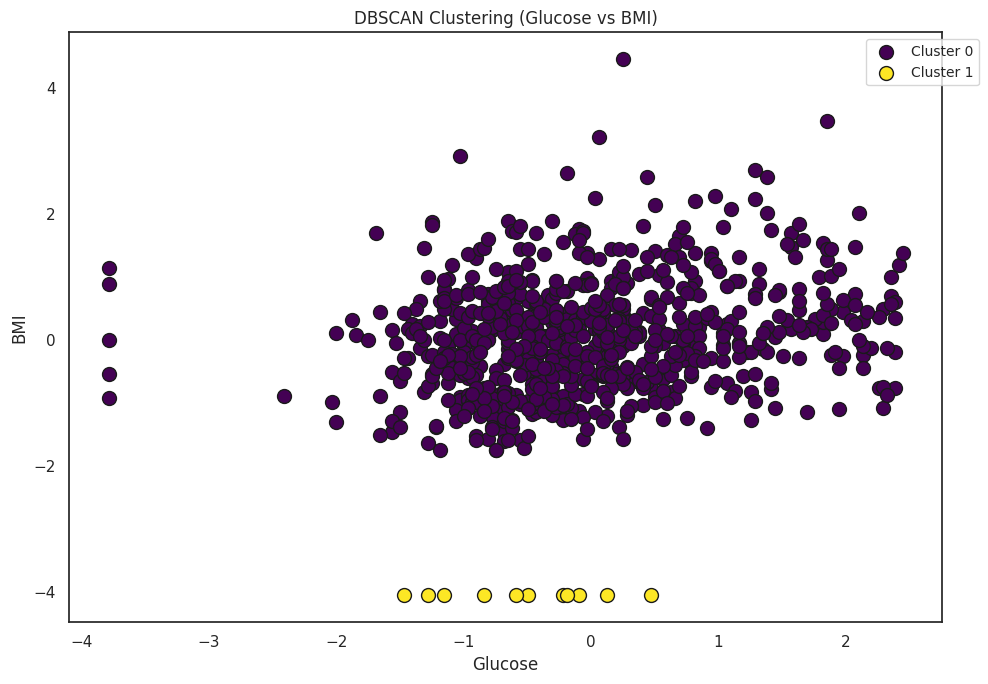

In [39]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Visualize the clusters with 'viridis' colormap
unique_labels = set(labels)
n_clusters_total = len(unique_labels)  # Total number of clusters including noise
viridis = plt.cm.get_cmap('viridis', n_clusters_total)

plt.figure(figsize=(10, 7))
for k in unique_labels:
    if k == -1:
        # Black used for noise.
        color = [0, 0, 0, 1]
    else:
        # Use viridis colormap for clusters
        color = viridis(k / (n_clusters_total - 1))  # Normalize to [0, 1] for colormap

    class_member_mask = (labels == k)

    # Core points
    xy = X_glucose_bmi[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[tuple(color)], edgecolor='k',
                s=100, label=f'Cluster {k}' if k != -1 else 'Noise')

    # Non-core points
    xy = X_glucose_bmi[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[tuple(color)], edgecolor='k',
                s=50)

plt.title('DBSCAN Clustering (Glucose vs BMI)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.tight_layout()
plt.show()
